<a href="https://colab.research.google.com/github/elmojesus/PokeGAN/blob/main/PokeGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gotta catch em' all!
You say you've seen every pokemon.
You think you've caught them all.

well, not for long

# Project Config

Preferably we want a Tesla V100, as they are the fastest. Unfortunately, they're only available for colab pro users.

Traininig without a V100 will take significantly longer.

Make sure you've enabled a GPU accelerator under "Runtime > Change Runtime Type"

In [2]:
!nvidia-smi

Mon May 17 20:08:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!git clone https://github.com/NVlabs/stylegan2-ada.git
%cd stylegan2-ada

Cloning into 'stylegan2-ada'...
remote: Enumerating objects: 71, done.
remote: Total 71 (delta 0), reused 0 (delta 0), pack-reused 71
Unpacking objects: 100% (71/71), done.
/content/stylegan2-ada


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Dataset

In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1MVs_9UCfdL0It5ZQ4Uixu8UCHHCo3oaX&export=download


Downloading...
From: https://drive.google.com/u/0/uc?id=1MVs_9UCfdL0It5ZQ4Uixu8UCHHCo3oaX
To: /content/stylegan2-ada/pokemon.tar.xz
945MB [00:09, 97.5MB/s]


In [ ]:
!mkdir pokemon
!tar xf pokemon.tar.xz -C ./pokemon

In [ ]:
!python dataset_tool.py create_from_images ../drive/My\ Drive/stylegan2-pokemon/dataset/ ./pokemon

Loading images from "./pokemon"
Creating dataset "../drive/My Drive/stylegan2-pokemon/dataset/"
dataset_tool.py:96: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[quant.tostring()]))}))
Added 4835 images.


In [ ]:
!mkdir dataset
!python dataset_tool.py create_from_images ./dataset ./pokemon

Loading images from "./pokemon"
Creating dataset "./dataset"
dataset_tool.py:96: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[quant.tostring()]))}))
Added 4835 images.


# Training

In [ ]:
!mkdir training-runs

In [ ]:
%ls

calc_metrics.py*  Dockerfile*   LICENSE.txt*   README.md*        train.py*
dataset_tool.py*  docs/         metrics/       style_mixing.py*
dnnlib/           generate.py*  projector.py*  training/


In [ ]:
!python train.py --outdir=../drive/My\ Drive/stylegan2-pokemon/training-runs \
                --gpus=1 \
                --data=../drive/My\ Drive/stylegan2-pokemon/dataset \
                --cfg=auto \
                --metrics none \
                --mirror=1 \
                --resume=../drive/My\ Drive/stylegan2-pokemon/training-runs/00006-dataset-mirror-auto1-resumecustom/network-snapshot-002822.pkl

tcmalloc: large alloc 4294967296 bytes == 0x5592ec240000 @  0x7fb2117e0001 0x7fb20ea2354f 0x7fb20ea73b58 0x7fb20ea77b17 0x7fb20eb16203 0x5592e49440e4 0x5592e4943de0 0x5592e49b86f5 0x5592e49b2e0d 0x5592e494602c 0x5592e4986d39 0x5592e4983c84 0x5592e49448e9 0x5592e49b8ade 0x5592e49b2b0e 0x5592e4884e2b 0x5592e49b51e6 0x5592e49b2b0e 0x5592e4884e2b 0x5592e49b51e6 0x5592e49b2e0d 0x5592e4884e2b 0x5592e49b51e6 0x5592e494569a 0x5592e49b3a45 0x5592e49b2b0e 0x5592e49b2813 0x5592e4a7c592 0x5592e4a7c90d 0x5592e4a7c7b6 0x5592e4a54103
tcmalloc: large alloc 4294967296 bytes == 0x5593ec240000 @  0x7fb2117de1e7 0x7fb20ea2346e 0x7fb20ea73c7b 0x7fb20ea7435f 0x7fb20eb16103 0x5592e49440e4 0x5592e4943de0 0x5592e49b86f5 0x5592e49b2b0e 0x5592e494577a 0x5592e49b486a 0x5592e49b2b0e 0x5592e494577a 0x5592e49b486a 0x5592e49b2b0e 0x5592e494577a 0x5592e49b486a 0x5592e494569a 0x5592e49b3a45 0x5592e49b2b0e 0x5592e494577a 0x5592e49b7e50 0x5592e49b2b0e 0x5592e494577a 0x5592e49b486a 0x5592e49b2e0d 0x5592e494602c 0x5592e498

# Testing

In [4]:
!gdown https://drive.google.com/u/0/uc?id=10o5zEzPeywzqtJVNH68X3XW-brya3ykE&export=download
network_pkl = 'network-snapshot-002822.pkl'

Downloading...
From: https://drive.google.com/u/0/uc?id=10o5zEzPeywzqtJVNH68X3XW-brya3ykE
To: /content/stylegan2-ada/network-snapshot-002822.pkl
283MB [00:01, 207MB/s]


In [5]:
!mkdir output

In [ ]:
!python generate.py --outdir=./output --trunc=1 --seeds=85,265,297,849 \
    --network=./network-snapshot-002822.pkl

Loading networks from "./network-snapshot-002822.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Generating image for seed 85 (0/4) ...
Generating image for seed 265 (1/4) ...
Generating image for seed 297 (2/4) ...
Generating image for seed 849 (3/4) ...


# Generating More Images

In [6]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import tensorflow as tf

In [7]:
tflib.init_tf()
#_G1, _D1, Gs1 = pickle.load(open(network_pkl, "rb"))
with dnnlib.util.open_url(network_pkl) as fp:
        _G1, _D1, Gs1 = pickle.load(fp)

In [8]:
def generate_images(seed, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    noise_vars = [var for name, var in Gs1.components.synthesis.vars.items() if name.startswith('noise')]
    label = np.zeros([1] + Gs1.input_shapes[1][1:])

    if seed is None:
      z = np.random.randn(1, *Gs1.input_shape[1:])
      tflib.set_vars({var: np.random.randn(*var.shape.as_list()) for var in noise_vars})
    else:
      rnd = np.random.RandomState(seed)
      z = rnd.randn(1, *Gs1.input_shape[1:]) # [minibatch, component]
      tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]

    images = Gs1.run(z, label, **Gs_kwargs) # [minibatch, height, width, channel]

    return PIL.Image.fromarray(images[0], 'RGB')


In [9]:
from tqdm import tqdm

In [10]:
import matplotlib.pyplot as plt

In [11]:
images = []
truncation_psi = 0.8

for i in tqdm(range(30)):
  images.append(generate_images(None, truncation_psi))

  0%|          | 0/30 [00:00<?, ?it/s]

Setting up TensorFlow plugin "fused_bias_act.cu": Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Compiling... Loading... Done.


100%|██████████| 30/30 [00:35<00:00,  1.20s/it]


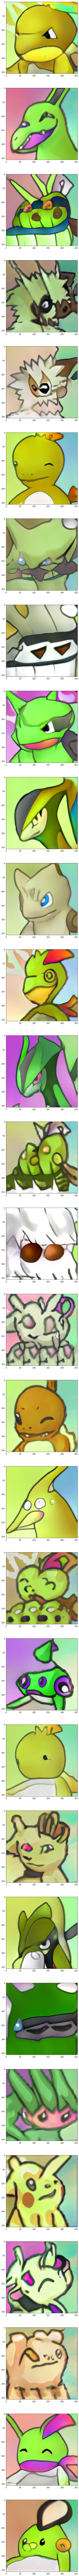

In [12]:
fig = plt.figure(figsize=(256, 256))

for i in range(len(images)):
    sub = fig.add_subplot(len(images), 1, i + 1)
    sub.imshow(images[i], interpolation='nearest')

### Interpolation

In [23]:
import os
import imageio
import glob

In [24]:
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [41]:
def save_video(anim_file, images, fps):
  with imageio.get_writer(anim_file, mode='I', fps=fps) as writer:
    last = -1
    for image in images:
      frame = 2*(i**0.5)
      if round(frame) > round(last):
          last = frame
      else:
          continue
      writer.append_data(img_to_array(image).astype(np.uint8))
    writer.append_data(img_to_array(image).astype(np.uint8))

In [33]:
support_doggos = 5
steps_between_doggos = 70
noise_denominator = 100
fix_noise = True 
truncation_psi = 0.5

filename = 'random_interpol.gif'
fps = 15

def interpolation_random():
    z = 265
    # if fix_noise:
    #    noise = random_noise()

    images = []
    for d in range(support_doggos):
        #z_ = random_z()

        # Linear interpolation
        #z_step = (z_ - z) / steps_between_doggos
        for i in tqdm(range(steps_between_doggos + 1)):
            # if not fix_noise:
                # noise = random_noise()
                #noise = {k: noise[k] / noise_denominator + noise[k] for k in noise.keys()}
            #images.append(generate_image(z, truncation_psi=truncation_psi, noise=noise))
            images.append(generate_images(z, truncation_psi))
            #z += z_step
            z += 1

    save_video(filename, images, fps)

In [42]:
interpolation_random()

100%|██████████| 71/71 [00:01<00:00, 43.79it/s]


# Transforming Humans into Pokemon

### Projecting onto FFHQ

### Combining FFHQ model and PokeGAN model